# KPI Analysis - Online Retail Dataset

This notebook builds on the cleaned dataset (`retail_clean.parquet`) and provides
business KPIs, trends, and top entities for a recruiter-ready summary.

## 1. Load Data

In [1]:
import pandas as pd
from pathlib import Path

def resolve_clean_path():
    candidates = [
        Path('data/processed/retail_clean.parquet'),
        Path('..') / 'data/processed/retail_clean.parquet',
    ]
    for path in candidates:
        if path.exists():
            return path
    raise FileNotFoundError('retail_clean.parquet not found in expected locations')

data_path = resolve_clean_path()
df = pd.read_parquet(data_path)
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## 2. Core KPIs

In [2]:
orders = df['InvoiceNo'].nunique()
customers = df['CustomerID'].dropna().nunique()
total_revenue = df['Revenue'].sum()
total_quantity = df['Quantity'].sum()
avg_order_value = total_revenue / orders
avg_items_per_order = total_quantity / orders
avg_unique_items = df.groupby('InvoiceNo')['StockCode'].nunique().mean()

kpis = pd.DataFrame({
    'Metric': [
        'Total Revenue', 'Orders', 'Customers',
        'Average Order Value', 'Items per Order', 'Unique Items per Order'
    ],
    'Value': [
        total_revenue, orders, customers, avg_order_value,
        avg_items_per_order, avg_unique_items
    ]
})
kpis

,Metric,Value
0,Total Revenue,1.064211e+07
1,Orders,1.996000e+04
2,Customers,4.338000e+03
3,Average Order Value,5.331719e+02
4,Items per Order,2.791794e+02
5,Unique Items per Order,2.603216e+01


## 3. Monthly Revenue Trend

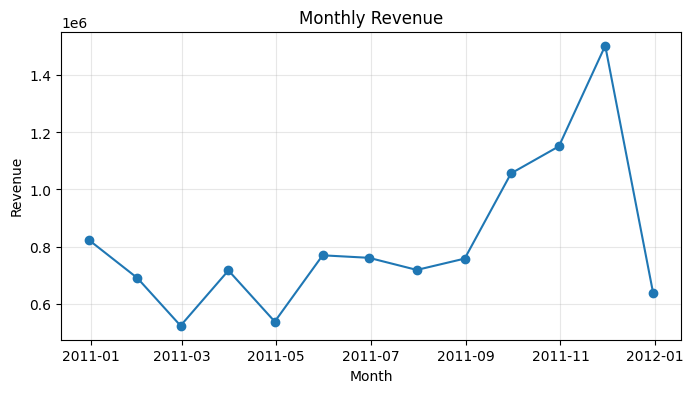

In [3]:
import matplotlib.pyplot as plt

monthly_revenue = (
    df.set_index('InvoiceDate')['Revenue']
    .resample('ME')
    .sum()
    .reset_index()
)
plt.figure(figsize=(8, 4))
plt.plot(monthly_revenue['InvoiceDate'], monthly_revenue['Revenue'], marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(alpha=0.3)
plt.show()

## 4. Top Entities

In [4]:
top_products = (
    df.groupby(['StockCode', 'Description'], dropna=False)['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
top_countries = (
    df.groupby('Country')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
top_customers = (
    df.dropna(subset=['CustomerID'])
    .groupby('CustomerID')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

top_products

,StockCode,Description,Revenue
0,DOT,DOTCOM POSTAGE,206248.77
1,22423,REGENCY CAKESTAND 3 TIER,174156.54
2,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,104284.24
4,47566,PARTY BUNTING,99445.23
5,85099B,JUMBO BAG RED RETROSPOT,94159.81
6,23166,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
7,POST,POSTAGE,78101.88
8,M,Manual,77750.27
9,23084,RABBIT NIGHT LIGHT,66870.03


In [5]:
top_countries

,Country,Revenue
0,United Kingdom,9001744.094
1,Netherlands,285446.340
2,EIRE,283140.520
3,Germany,228678.400
4,France,209625.370
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,57067.600
8,Belgium,41196.340
9,Sweden,38367.830


In [6]:
top_customers

,CustomerID,Revenue
0,14646,280206.02
1,18102,259657.30
2,17450,194390.79
3,16446,168472.50
4,14911,143711.17
5,12415,124914.53
6,14156,117210.08
7,17511,91062.38
8,16029,80850.84
9,12346,77183.60


## 5. Summary

- Revenue is concentrated in a small number of countries and customers.
- There is visible seasonality in monthly revenue.
- Top products can be used for bundling and upsell strategies.